## Homework:

### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1.) Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2.) Let's write periodic boundary condition allowing the wave propagating from the right to the left or left to the right and run the code for longer tend. (hint: after each timestep, set quantities at the leftmost grid the same as quantities at the second to the rightmost grids U[0]=U[-2]; set quantities at the rightmost grid the same as quantities at the second to the leftmost grids.)

3.) Please experiment with different grid sizes.

# Upwind Method on Burger's Equation

<IPython.core.display.Javascript object>


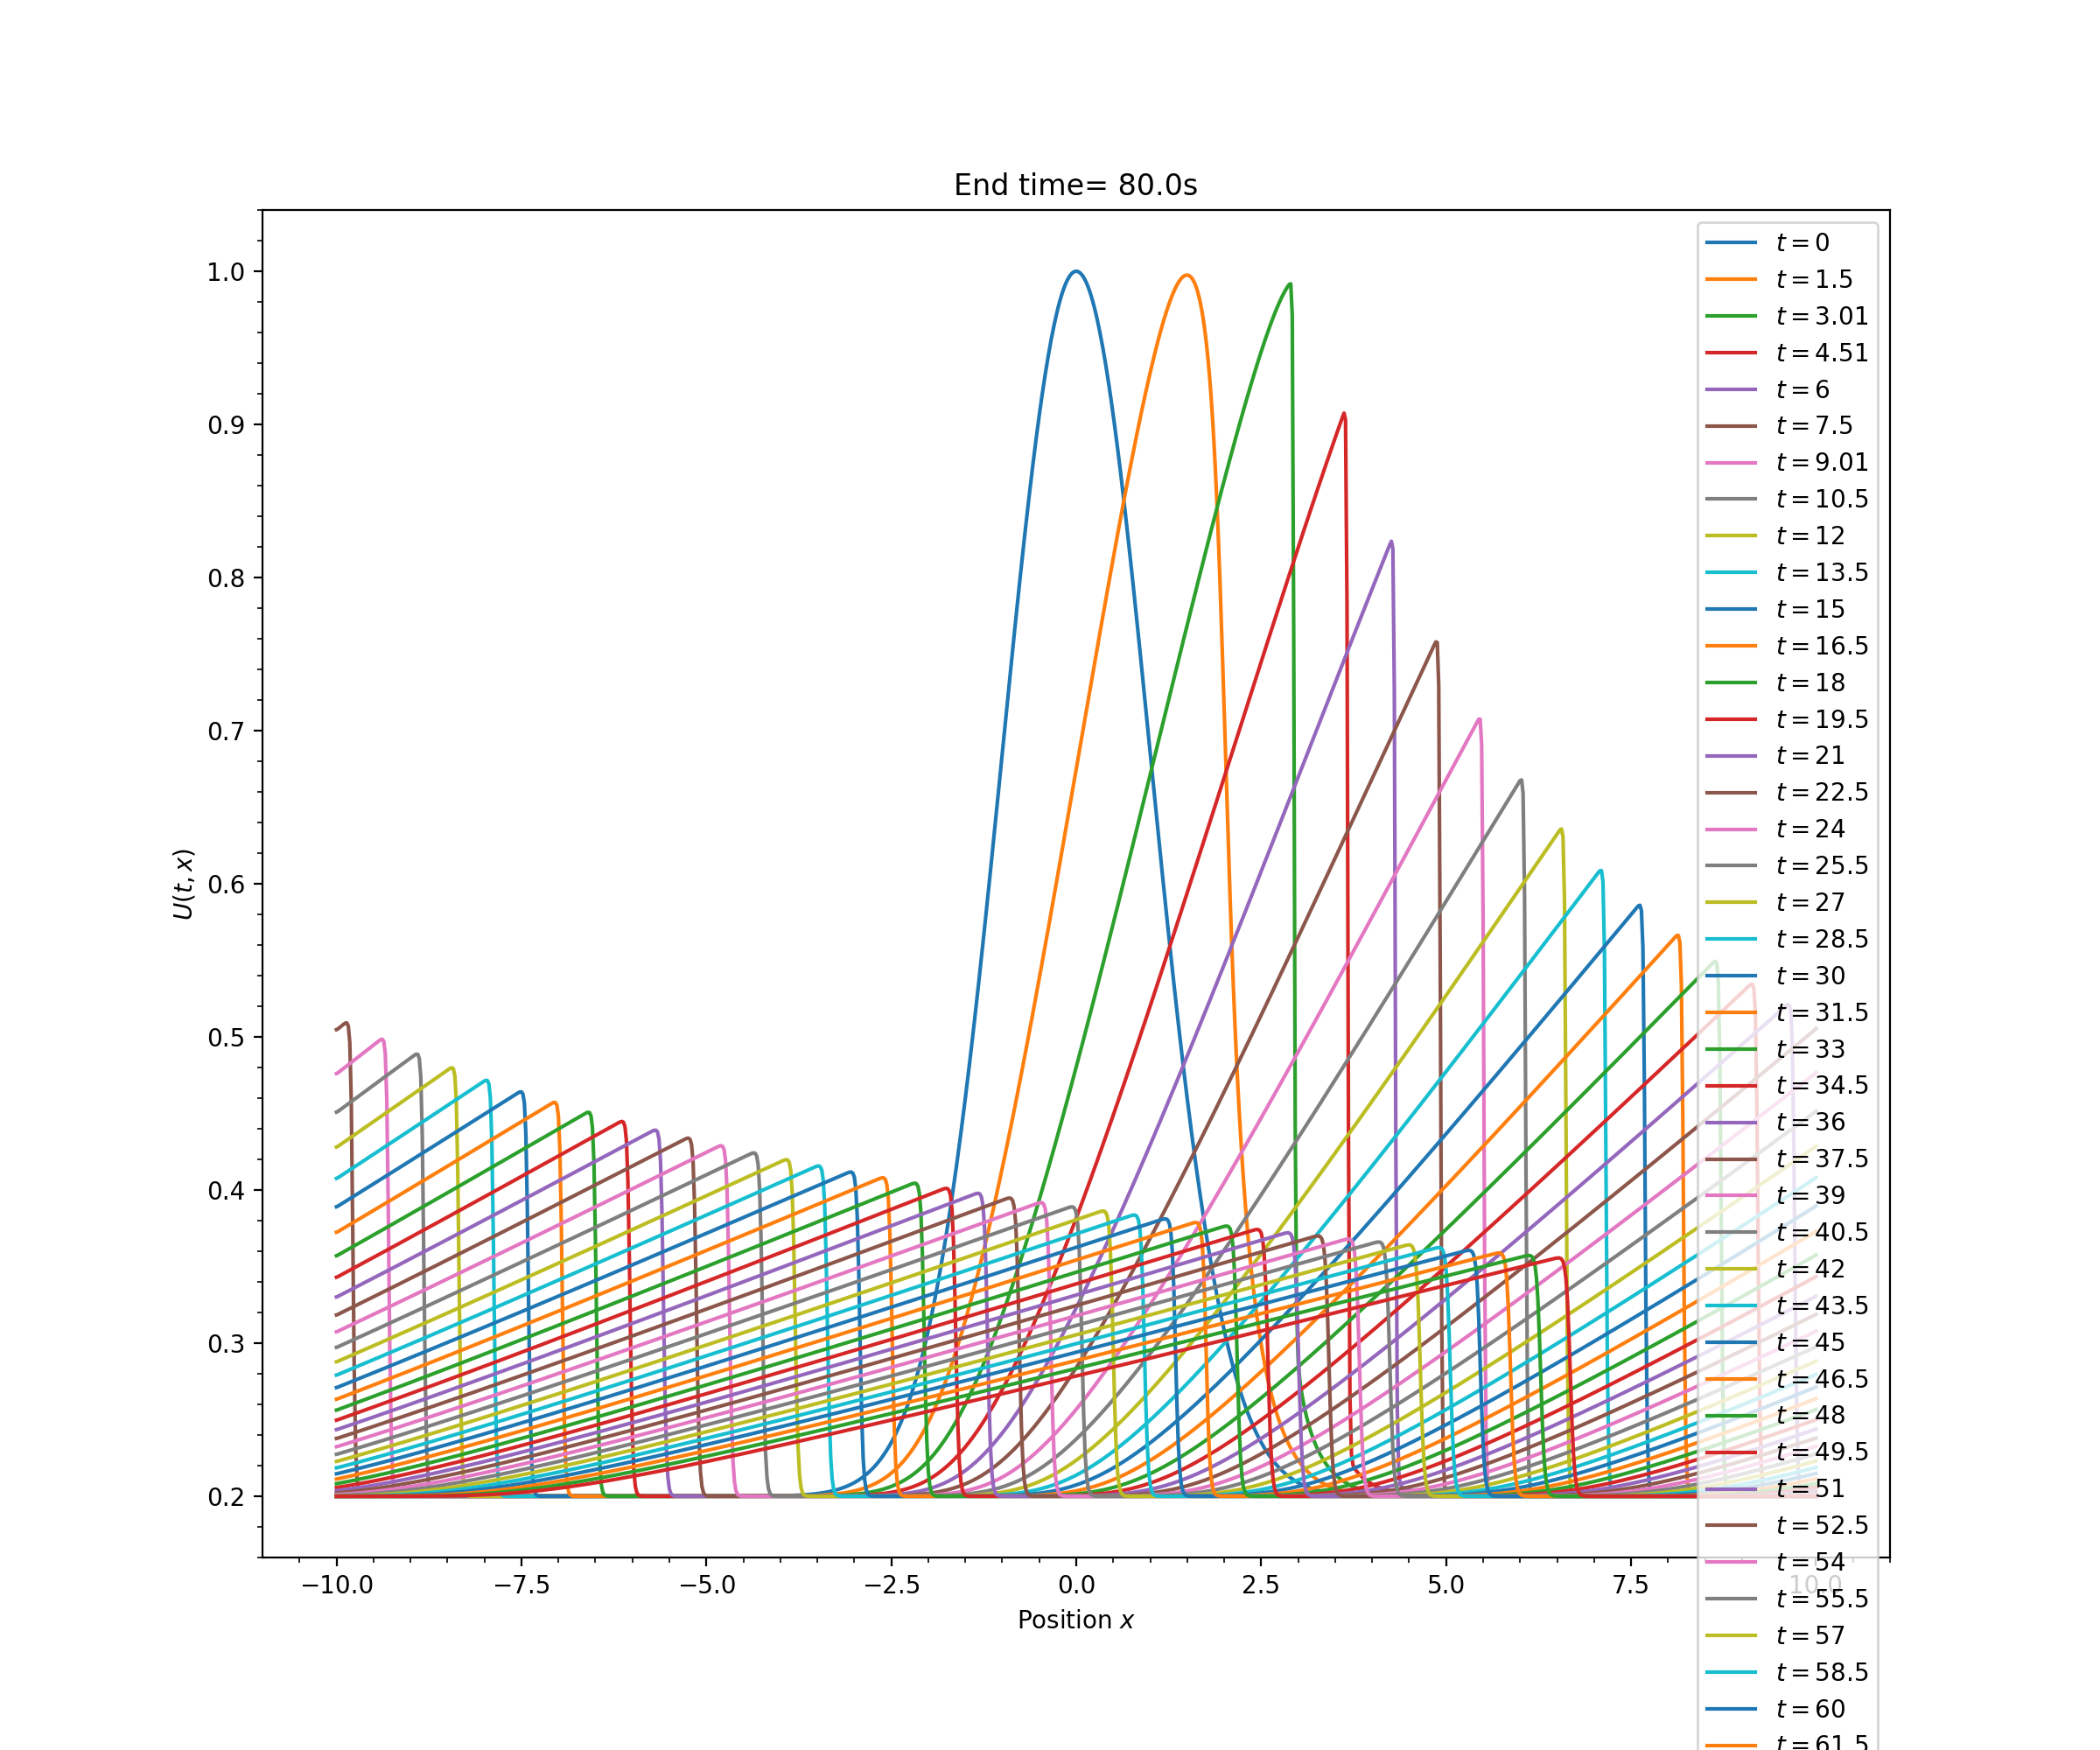

t =  1.5040000000000011
t =  3.0080000000000022
t =  4.512000000000003
t =  6.000000000000004
t =  7.504000000000006
t =  9.008000000000006
t =  10.512000000000008
t =  12.000000000000009
t =  13.50400000000001
t =  15.008000000000012
t =  16.511999999999954
t =  18.01599999999979
t =  19.503999999999625
t =  21.00799999999946
t =  22.511999999999293
t =  24.015999999999128
t =  25.503999999998964
t =  27.0079999999988
t =  28.511999999998633
t =  30.015999999998467
t =  31.503999999998303
t =  33.00799999999814
t =  34.511999999997975
t =  36.01599999999781
t =  37.503999999997646
t =  39.00799999999748
t =  40.511999999997315
t =  42.01599999999715
t =  43.503999999996985
t =  45.00799999999682
t =  46.511999999996654
t =  48.01599999999649
t =  49.503999999996324
t =  51.00799999999616
t =  52.51199999999599
t =  54.01599999999583
t =  55.50399999999566
t =  57.0079999999955
t =  58.51199999999533
t =  60.01599999999517
t =  61.503999999995
t =  63.00799999999484
t =  64.51199999999

<IPython.core.display.Javascript object>


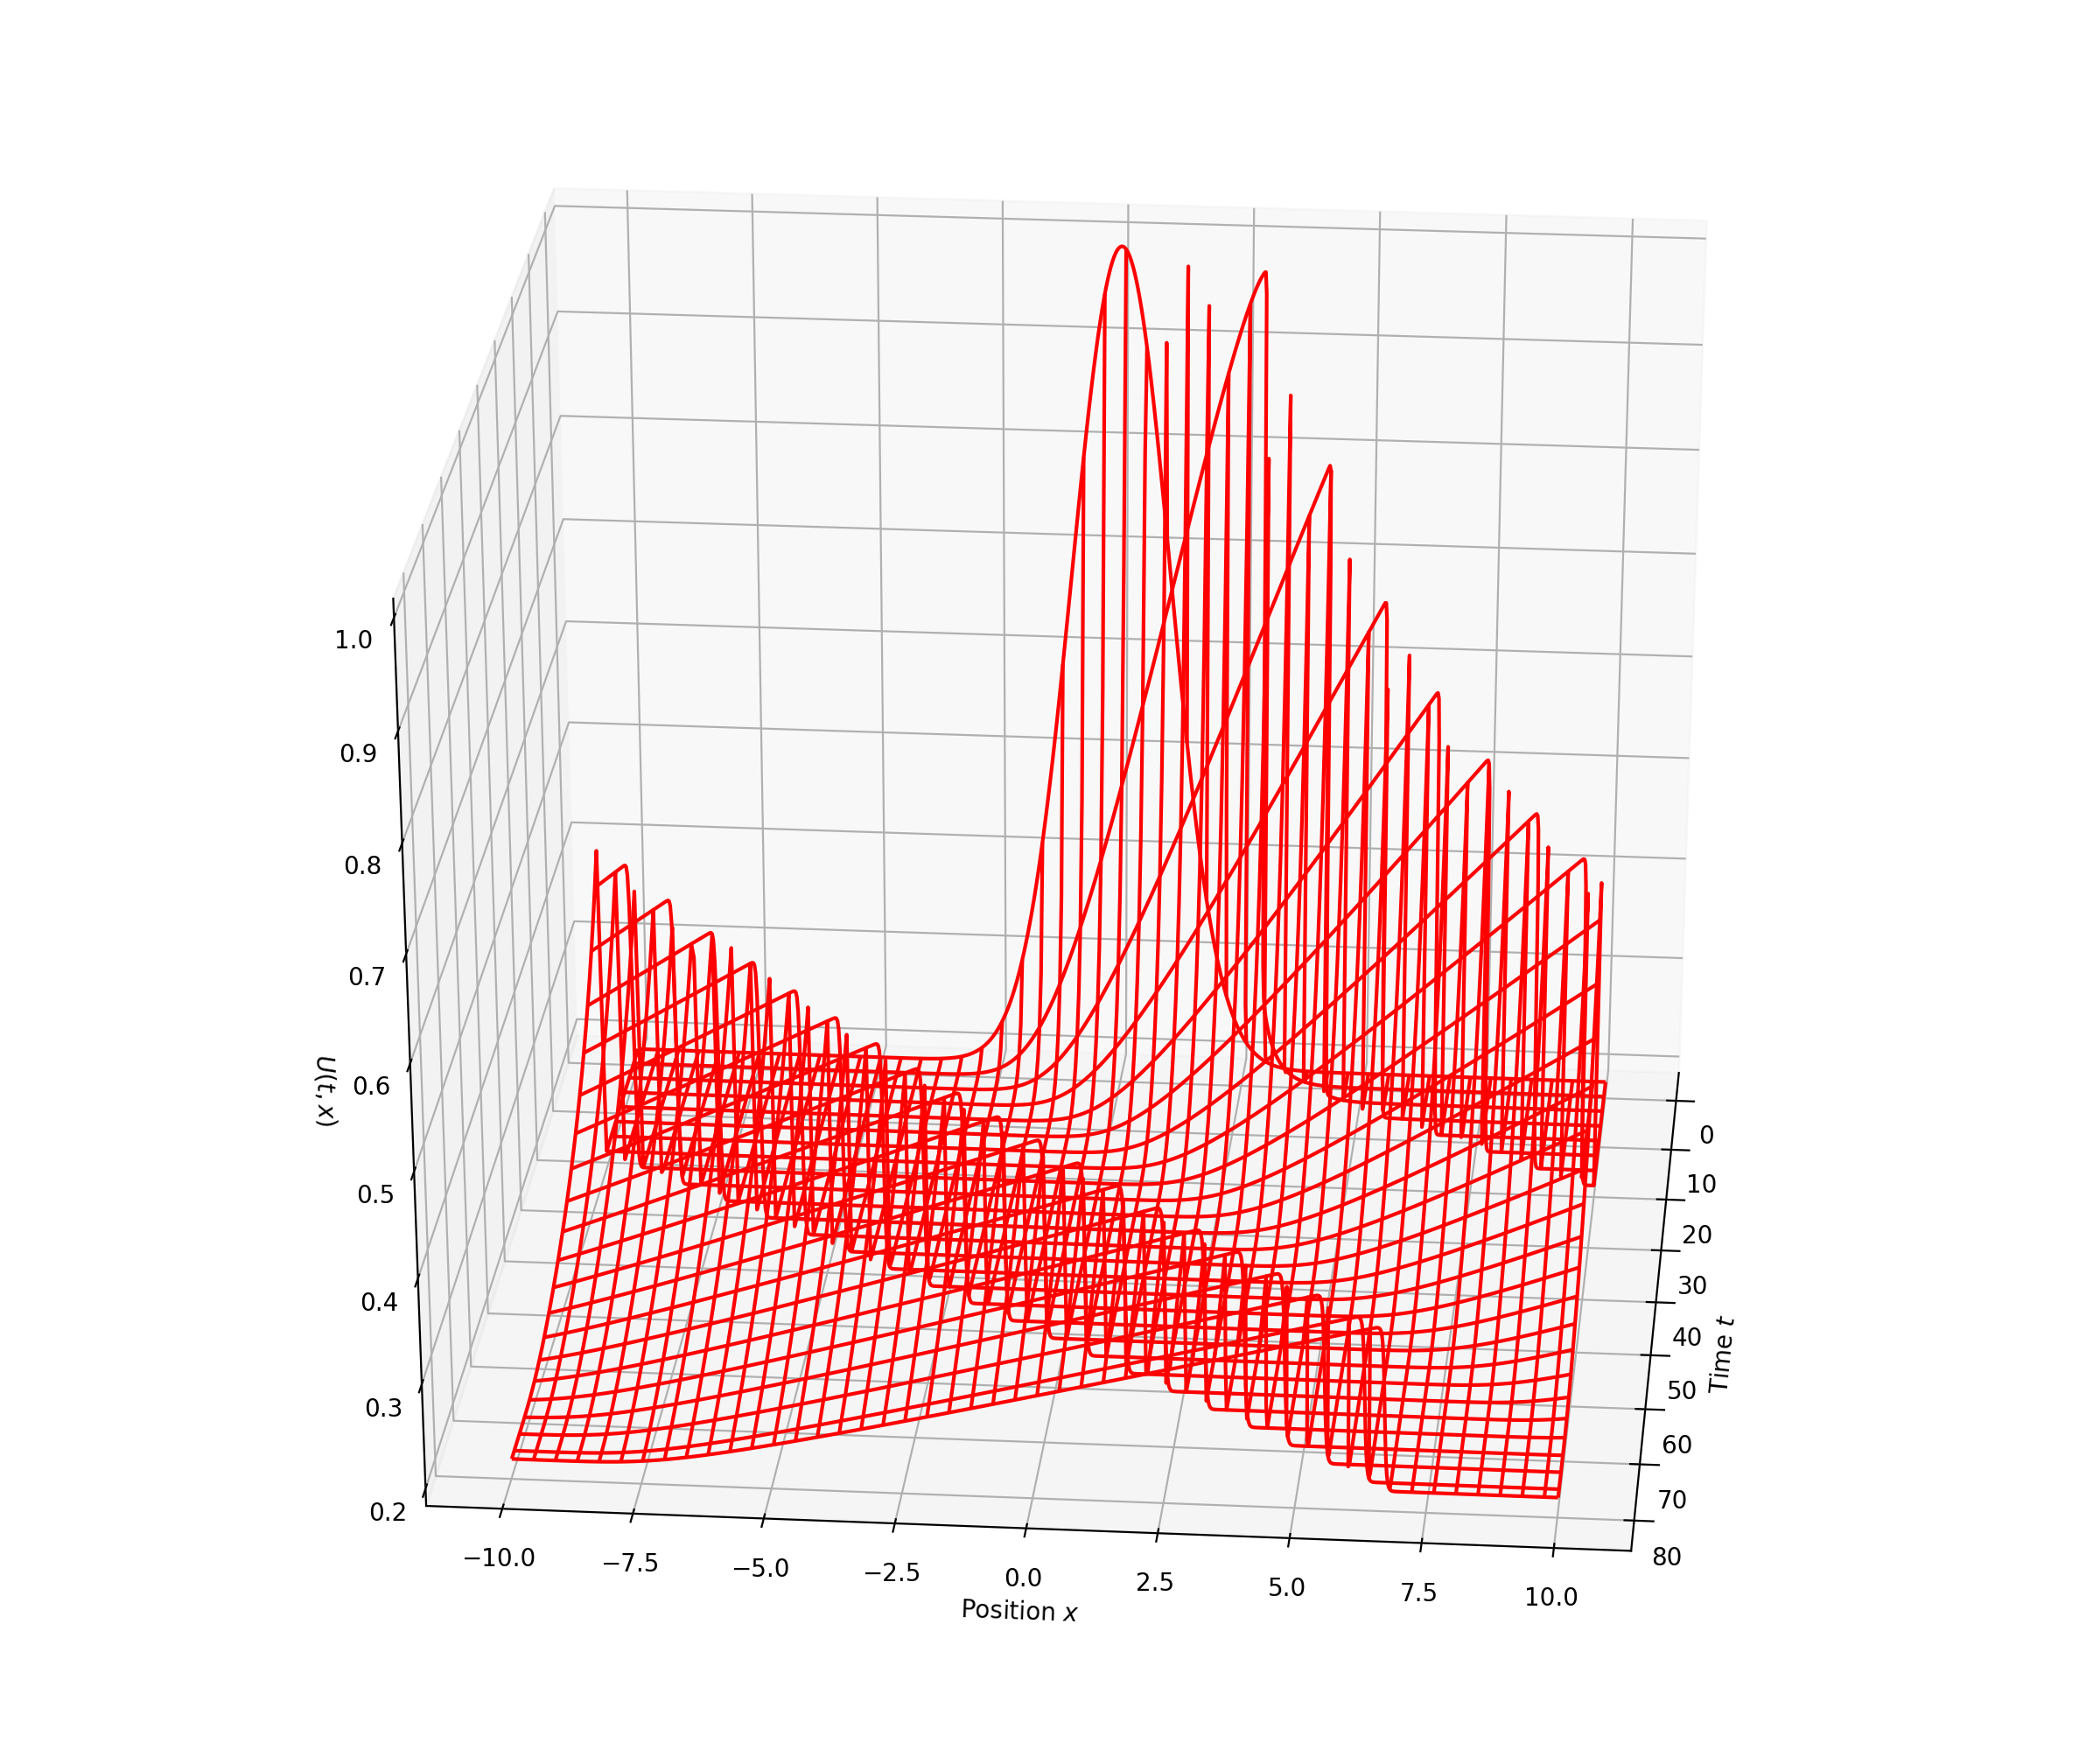

Done.


In [1]:
# Burger's equation:
%matplotlib notebook
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 1001      # number of grid points (including boundary)
tend = 80.0    # end time
dtout = 1.50   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)


# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.set_title("End time= "+ str(tend)+"s")
ax.minorticks_on()


# Begin the simulation.
tout = t + dtout
while t < tend:
    U[0]=U[-2]
    U[-1]=U[1]
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if Uold[ix]>0:
            U[ix] = Uold[ix] - Uold[ix] * dt / dx * (Uold[ix] - Uold[ix-1])
           ## print("positive")
        else:
            U[ix] = Uold[ix] - Uold[ix] * dt / dx * (Uold[ix+1] - Uold[ix])
            ##print("-")
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(10,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

# Different Grid Sizes

Done. Number of grid points=  101


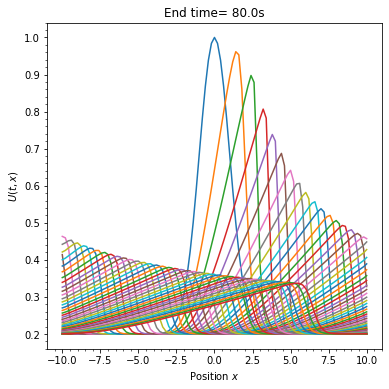

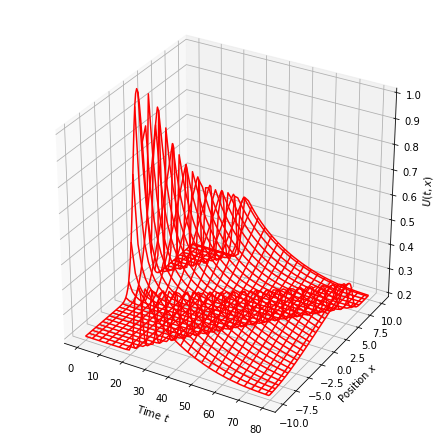

Done. Number of grid points=  501


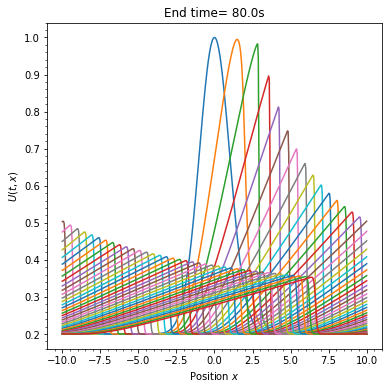

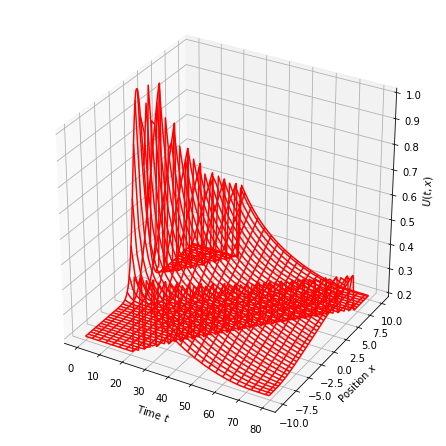

Done. Number of grid points=  1001


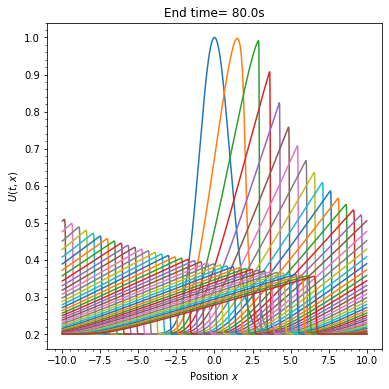

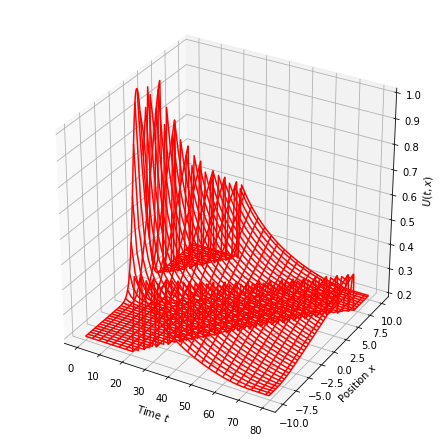

Done. Number of grid points=  2001


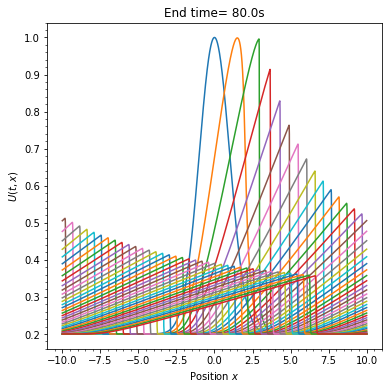

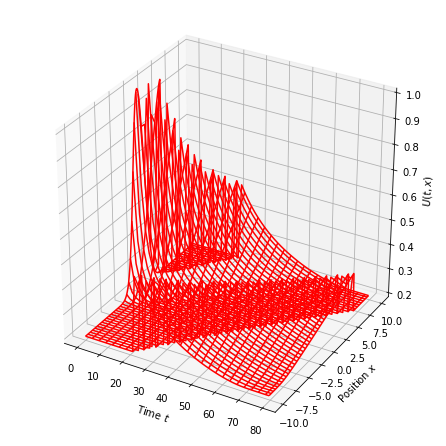

In [50]:
#Burger's equation:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
     # number of grid points (including boundary)
tend = 80.0    # end time
dtout = 1.50   # time interval for outputs


Nxl=[101,501,1001,2001]
for i in range(len(Nxl)):
    Nx = Nxl[i]

# Set up the grid.
    x = np.linspace(xmin, xmax, Nx)
    dx = (xmax - xmin) / (Nx - 1)
    dt = 0.8 * dx
    U = np.zeros(Nx,)


# Give the initial profile.
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

    tp = [t]
    Up = np.copy(U)

# Initiate the plot.
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.set_title("End time= "+ str(tend)+"s")
    ax.minorticks_on()
    

# Begin the simulation.
    tout = t + dtout
    while t < tend:
        U[0]=U[-2]
        U[-1]=U[1]
    # Backup the previous time step.
        Uold = np.copy(U)

    # Find the state at the next time step.
        for ix in range(1, Nx - 1):
            if Uold[ix]>0:
                U[ix] = Uold[ix] - Uold[ix] * dt / dx * (Uold[ix] - Uold[ix-1])
           ## print("positive")
            else:
                U[ix] = Uold[ix] - Uold[ix] * dt / dx * (Uold[ix+1] - Uold[ix])
            ##print("-")
        t += dt

    # Save the data after every dtout.
        if t >= tout:
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            tp.append(t)
            Up = np.vstack((Up, U))
            tout += dtout



# Create 3D-view of the solution.
    t, x = np.meshgrid(tp, x)
    fig3D = plt.figure(figsize=(6,6))
    ax3D = Axes3D(fig3D)
    ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
    ax3D.set_xlabel("Time $t$")
    ax3D.set_ylabel("Position $x$")
    ax3D.set_zlabel(r"$U(t,x)$")

    print("Done. Number of grid points= ", str(Nx))
    plt.show(),



# Asymmetry  In Outcome
We know:

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

is the same as :

\begin{equation}
\frac{\partial U}{\partial t}+\frac{\partial(\frac{1}{2}U^{2})}{\partial x}=0.
\end{equation}


We can see that for a method to be conservative it has to fit the form 
\begin{equation}
U_{j}^{n+1} = U_{j}^n- \frac{\Delta t}{\Delta x}(F(U_{j}^n)-F(U_{j-1}^n))
\end{equation}

where $$ F = \frac{1}{2} U^{2}$$

but these are all still first order methods of calculation giving rise to dissappation. for a lower dissappation rate second order methods would be better such as Lax-Wendroff and Warming-Beam numerical schemes

Source: https://www.reading.ac.uk/web/files/maths/rakhib_ahmed.pdf